# Working with Matplotlib
*Authored by Andrea Walker February 2021; these are my own personal tips, tricks and best practices from my experience. I make no guarantee of the accuracy of the content; however, as of the time of writing, all code works in Jupyter with Python 3.8.5 and matplotlib 3.3.2 .*

In [1]:
#optionally find out your python and matplotlib version
'''
from platform import python_version
print('python =',python_version())
import matplotlib
print('matplotlib =',matplotlib.__version__)
'''

python = 3.8.5
matplotlib = 3.3.2


## Always start with the standard imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Single Plots

In [3]:
#data
x = np.linspace(0,6,100)
y = np.cos(x)
y2 = np.sin(x)
rand = np.random.rand(10)

### Calling plt. \<method>() creates a new figure environment. 
Further calls to plt.\<other methods>() either plot on or modify the same figure, until plt.show() is called:

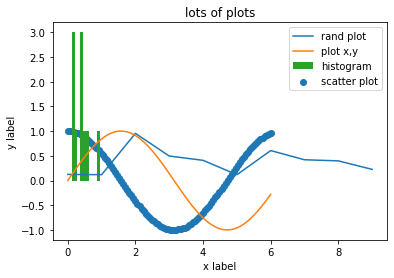

In [4]:
plt.plot(rand, label='rand plot')
plt.scatter(x,y,label='scatter plot')
plt.plot(x,y2,label='plot x,y')
plt.hist(rand,label='histogram')
plt.legend(loc='upper right') # creates legend; you can set the location 
plt.title('lots of plots')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

### Note the difference when you use the same code but call plt.show() in between calling plt methods:

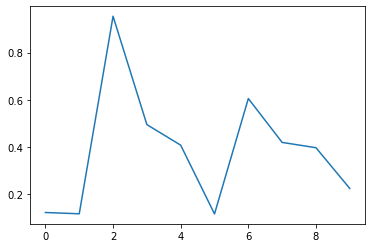

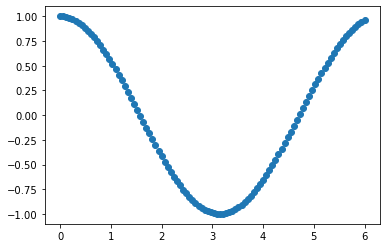

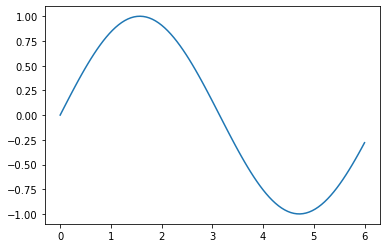

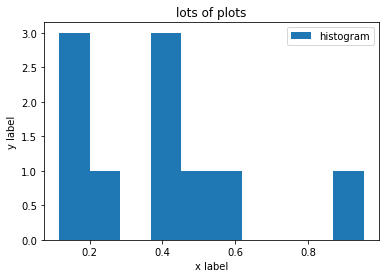

In [5]:
plt.plot(rand, label='rand plot')
plt.show()
plt.scatter(x,y,label='scatter plot')
plt.show()
plt.plot(x,y2,label='plot x,y')
plt.show()

plt.hist(rand,label='histogram')
plt.legend(loc='upper right') # creates legend; you can set the location 
plt.title('lots of plots')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

## Within each call to a plotting method you can often change the line color, weight, marker color, weight, style, etc. Look up the Documentation / Stackexchange. 

## Non-standard / user-defined legends: 
This documentation has been super useful for custom / non-standard legends, especially the third example: 
https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

# Multiple Plots (Working with the figure environment and subplots)

## There are two main ways I typically create multiple plots
* using fig.add_subplot()
* using plt.subplots()

### 1. fig.add_subplots() is a little more flexible. 
 First you create a figure environment, then you add subplots to it. You can add them all at the start when you create the figure, or at any time lower in the code.\
 Whenever you add a subplot, you include 3 numbers as the argument to the command: \
i.e. ax1 = fig.add_subplot(231) 

* 2  - the first number is the number of rows of the figure
* 3 - the second number is the number of columns of the figure
* 1 - the third number is the position of the subplot you are adding. The subplots are numbered row-wise, from the upper left, across the row, then the number continues in the next row. 

i.e.\
 1                       2                       3 \
 4                       5                       6 
 
 
 **One thing that is different about fig.add_subplots()  is the syntax for adding subplot axis labels and titles (as well as other commands) is different from when you are using a single plot. You might have to google around a bit.**
 
 See the example below. 

(array([21., 10.,  7.,  7.,  7.,  7.,  6.,  8., 10., 17.]),
 array([-9.99950772e-01, -7.99955695e-01, -5.99960618e-01, -3.99965541e-01,
        -1.99970463e-01,  2.46137893e-05,  2.00019691e-01,  4.00014768e-01,
         6.00009846e-01,  8.00004923e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

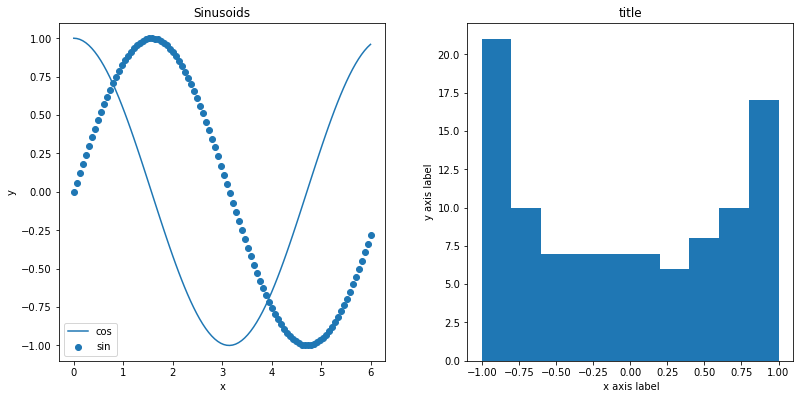

In [6]:
# Create a figure environment and define the size using the figsize argument
fig = plt.figure(figsize=(12, 12))


#Add subplots
ax1 = fig.add_subplot(221) # the three numbers are important! 
ax2 = fig.add_subplot(222, title='title',xlabel=" x axis label",ylabel='y axis label') #set title and axis labels here

###    Try uncommenting out the next two lines and see how the figure changes ###
# Try uncommenting ax4 only; then try uncommenting both. 

#ax3 = fig.add_subplot(223, title='title',xlabel=" x axis label",ylabel='y axis label')
#ax4 = fig.add_subplot(224,title='title',xlabel=" x axis label",ylabel='y axis label')
fig.subplots_adjust(hspace=0.25, wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95)

x = np.linspace(0,6,100)
y = np.cos(x)
y2 = np.sin(x)

ax1.plot(x,y,label='cos') #label used for the legend
ax1.scatter(x,y2,label='sin')
ax1.set_title('Sinusoids') #alternate place to set title and axis labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend() # command to include legend

ax2.hist(y)




### 2. The method plt.subplots() is a little more rigid, and defines the entire figure at the beginning

* You create a figure object with the subplots (denoted ax0, ax1 ...) all at once at the start
* plt.subplots() takes three main arguments, nrows, ncols, and figsize (I think these are intuitive enough). *note: figsize is a tuple (xdim, ydim)*
* plt.subplots returns two things: a figure object, and a tuple 
* if you have one row, this tuple will contain the subplot objects for that row
* if you have more than one row, this tuple will be composed of tuples, one for each row of the figure. Inside the tuple for each row will be the subplot objects for that row. See below for examples.



#### Subplots with one row: 

<ipython-input-7-6092476e2489>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


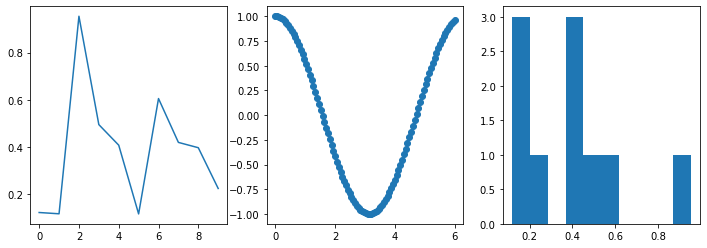

In [7]:

fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax0.plot(rand, label='rand plot')
ax1.scatter(x,y,label='scatter plot')
ax2.hist(rand,label='histogram')
fig.show()

#### Subplots with multiple rows: 


(array([3., 1., 0., 3., 1., 1., 0., 0., 0., 1.]),
 array([0.11720058, 0.2008381 , 0.28447561, 0.36811313, 0.45175064,
        0.53538815, 0.61902567, 0.70266318, 0.7863007 , 0.86993821,
        0.95357573]),
 <BarContainer object of 10 artists>)

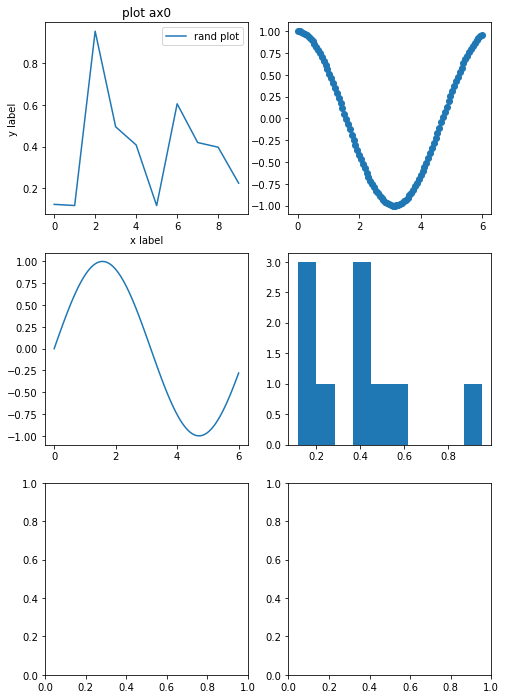

In [8]:
fig, (row0,row1,row2) = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
#extract the subplots from each row:
ax0, ax1 = row0
ax2, ax3 = row1
ax4, ax5 = row2
#do some plotting
ax0.plot(rand, label='rand plot')
ax0.set_title('plot ax0')
ax0.set_xlabel('x label')
ax0.set_ylabel('y label')
ax0.legend()
ax1.scatter(x,y,label='scatter plot')
ax2.plot(x,y2,label='plot x,y')
ax3.hist(rand,label='histogram')


### Happy coding! :)

# Appendix : Useful Methods

## Layout

### Automatic and Manual figure adjustment

In [ ]:
plt.tight_layout() #automatic figure and subfigure resizing

fig.subplots_adjust(hspace=0.25, wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95) #manual adjust

In `fig.subplots_adjust()`,
* hspace is height between subplots
* wspace is width between subplots
* right, left, top, bottom are margins, I think

### Inverting axes: 

In [ ]:
plt.gca().invert_yaxis() # single plot
ax.invert_yaxis() # subplot environment

### Manually setting the xticks to non-default values / labels:

#### matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)[source]
> Get or set the current tick locations and labels of the x-axis. \
> Pass no arguments to return the current values without modifying them.
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

In [ ]:
plt.xticks(ticks=None, labels=None, **kwargs)

### Annotating data points

#### matplotlib.pyplot.annotate(text, xy, *args, **kwargs)
>Annotate the point xy with text text. \
>In the simplest form, the text is placed at xy. \
>Optionally, the text can be displayed in another position xytext. An arrow pointing from the text to the annotated point xy can then be added by defining arrowprops. \
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

*Useful Stackexchange article: https://stackoverflow.com/questions/22272081/label-python-data-points-on-plot*

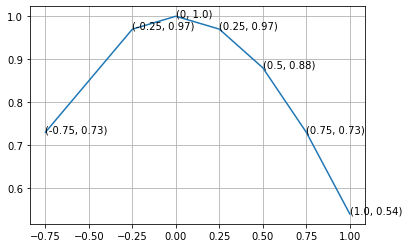

In [10]:
#from stackexchange:
fig = plt.figure()
ax = fig.add_subplot(111)

A = -0.75, -0.25, 0, 0.25, 0.5, 0.75, 1.0
B = 0.73, 0.97, 1.0, 0.97, 0.88, 0.73, 0.54

plt.plot(A,B)
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.grid()
plt.show()